Between distributor, release date, runtime and genre, which variable affects the sales price the most?

In [2]:
#Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [3]:
#Create data frame
movie_data = pd.read_csv('movie_data.csv')
movie_data.head()

,id,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,"February 16, 2018",700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,"April 27, 2018",678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [4]:
#Data type of variables
movie_data.dtypes

id                             int64
Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
Genre                         object
Movie Runtime                 object
License                       object
dtype: object

Finding correlation between distributor and world sales

In [5]:
#Create data frame for distributor and world sales columns
distributor_data = pd.DataFrame(movie_data['Distributor'])
world_sales = pd.DataFrame(movie_data['World Sales (in $)'])

#Joint data frame for distributor and world sales data
jointDF = pd.concat([distributor_data, world_sales], axis = 1)
jointDF

,Distributor,World Sales (in $)
0,Walt Disney Studios Motion Pictures,2069521700
1,Walt Disney Studios Motion Pictures,2797501328
2,Twentieth Century Fox,2847246203
3,Walt Disney Studios Motion Pictures,1347597973
4,Walt Disney Studios Motion Pictures,2048359754
...,...,...
913,New Line Cinema,117815157
914,Paramount Pictures,102992536
915,Sony Pictures Entertainment (SPE),204594016
916,New Line Cinema,107363905


In [6]:
#Calculate no. of movies from each distributor
unique = distributor_data['Distributor'].unique()
print(distributor_data['Distributor'].value_counts())

Warner Bros.                           158
Walt Disney Studios Motion Pictures    155
Universal Pictures                     119
Twentieth Century Fox                  117
Sony Pictures Entertainment (SPE)      101
Paramount Pictures                      99
DreamWorks                              21
New Line Cinema                         21
Lionsgate                               19
DreamWorks Distribution                 17
Metro-Goldwyn-Mayer (MGM)               12
TriStar Pictures                         9
Miramax                                  9
Revolution Studios                       8
Columbia Pictures                        7
Dimension Films                          7
The Weinstein Company                    6
Summit Entertainment                     5
Fox Searchlight Pictures                 4
STX Entertainment                        3
Orion Pictures                           3
Screen Gems                              3
United Artists                           2
Focus Featu

Distributors from Dreamworks onwards did not have many movies so we will remove them.

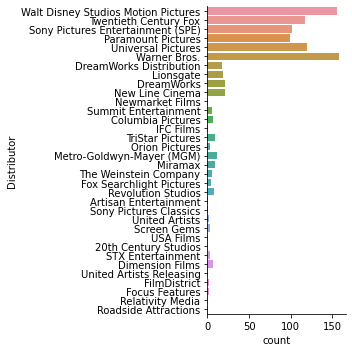

In [7]:
sb.catplot(y = 'Distributor', data = distributor_data, kind = 'count', height = 5)

Extract out the top 6 distributors

In [8]:
#Place data from top 6 distributors into new data frame
top_distributors = ['Walt Disney Studios Motion Pictures', 'Twentieth Century Fox', 'Sony Pictures Entertainment (SPE)', 'Paramount Pictures', 'Universal Pictures', 'Warner Bros.']
jointDF2 = jointDF[jointDF.Distributor.isin(top_distributors) == True]
jointDF2

,Distributor,World Sales (in $)
0,Walt Disney Studios Motion Pictures,2069521700
1,Walt Disney Studios Motion Pictures,2797501328
2,Twentieth Century Fox,2847246203
3,Walt Disney Studios Motion Pictures,1347597973
4,Walt Disney Studios Motion Pictures,2048359754
...,...,...
911,Walt Disney Studios Motion Pictures,182057016
912,Paramount Pictures,152022101
914,Paramount Pictures,102992536
915,Sony Pictures Entertainment (SPE),204594016


<AxesSubplot:xlabel='Distributor', ylabel='World Sales (in $)'>

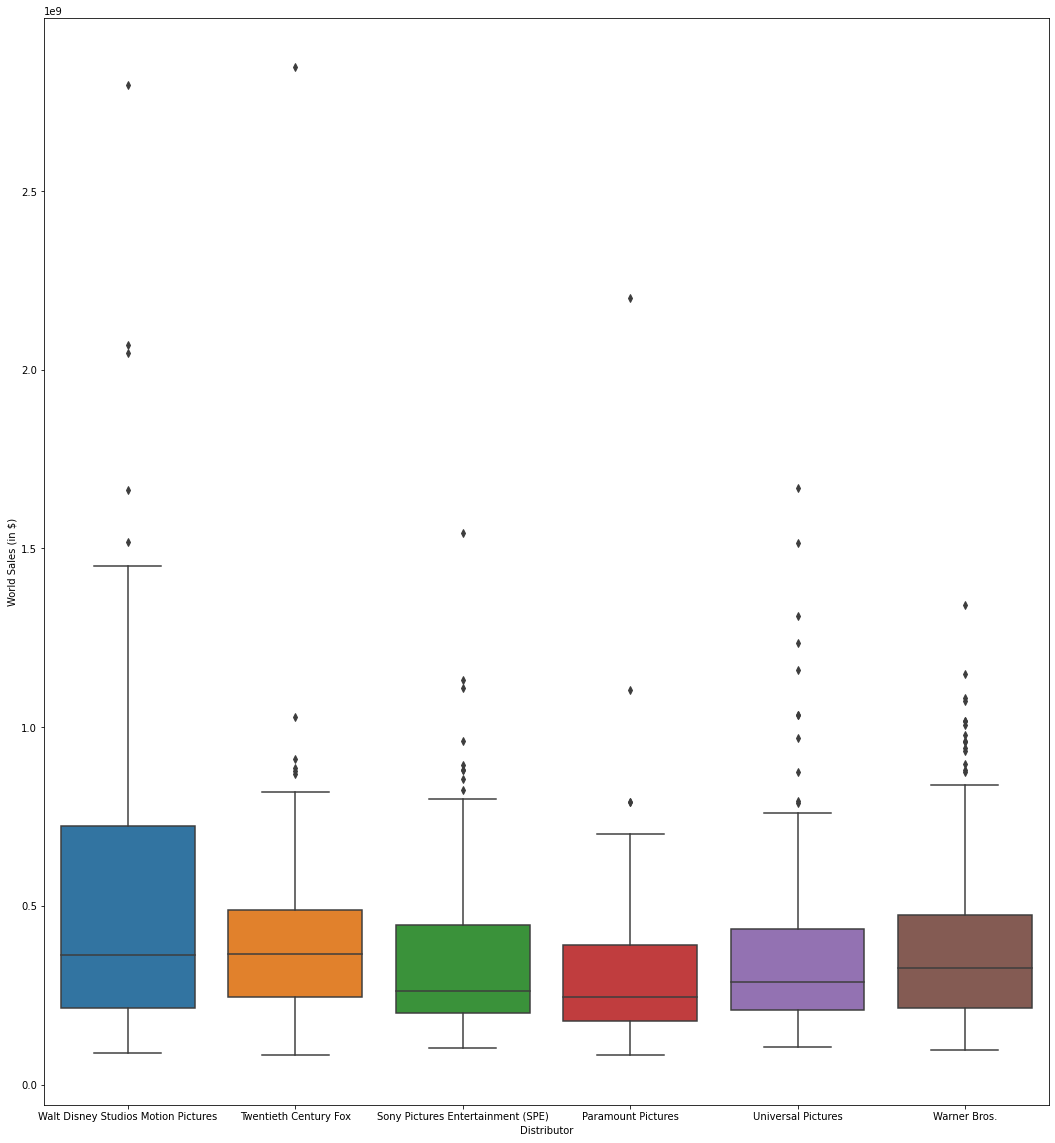

In [9]:
#Boxplot for top 6 distributors
f, axes = plt.subplots(1, figsize=(18, 20))
sb.boxplot(x = 'Distributor', y = 'World Sales (in $)', data = jointDF2, orient = 'v')

Extracting movie release dates and price

In [10]:
#Create data frame for release date columns
release_date_data = pd.DataFrame(movie_data['Release Date'])


#Joint data frame for Release Date and World Sales data
jointReleaseSales = pd.concat([release_date_data, world_sales], axis = 1)
jointReleaseSales

,Release Date,World Sales (in $)
0,"December 16, 2015",2069521700
1,"April 24, 2019",2797501328
2,"December 16, 2009",2847246203
3,"February 16, 2018",1347597973
4,"April 27, 2018",2048359754
...,...,...
913,"June 25, 2004",117815157
914,"December 21, 2001",102992536
915,"August 13, 2010",204594016
916,"October 17, 2003",107363905


Extract the dates based on its months


In [11]:
#extract the months from the release date column
jointReleaseSales['Month Released'] = jointReleaseSales['Release Date'].str.extract("(\\w+)", expand=True)
print(jointReleaseSales)

          Release Date  World Sales (in $) Month Released
0    December 16, 2015          2069521700       December
1       April 24, 2019          2797501328          April
2    December 16, 2009          2847246203       December
3    February 16, 2018          1347597973       February
4       April 27, 2018          2048359754          April
..                 ...                 ...            ...
913      June 25, 2004           117815157           June
914  December 21, 2001           102992536       December
915    August 13, 2010           204594016         August
916   October 17, 2003           107363905        October
917       July 6, 2011           169852759           July

[918 rows x 3 columns]


Checking for NULL values in data frame

In [12]:
#Calculate no. of null values in each column
jointReleaseSales.isnull().sum()

Release Date          65
World Sales (in $)     0
Month Released        65
dtype: int64

In [13]:
#Dropping Na Values from data frame
jointReleaseSales['Month Released']= jointReleaseSales['Month Released'].fillna("Unknown")
jointReleaseSales

,Release Date,World Sales (in $),Month Released
0,"December 16, 2015",2069521700,December
1,"April 24, 2019",2797501328,April
2,"December 16, 2009",2847246203,December
3,"February 16, 2018",1347597973,February
4,"April 27, 2018",2048359754,April
...,...,...,...
913,"June 25, 2004",117815157,June
914,"December 21, 2001",102992536,December
915,"August 13, 2010",204594016,August
916,"October 17, 2003",107363905,October


In [14]:
#Calculate no. of movies from each month
unique = jointReleaseSales['Month Released'].unique()
print(jointReleaseSales['Month Released'].value_counts())

June         131
December     124
July         106
May           99
November      96
Unknown       65
March         60
August        52
October       50
February      45
April         36
September     35
January       19
Name: Month Released, dtype: int64


In [15]:
#New Dataframe with only the Months and World Sales
MonthSales = pd.concat([jointReleaseSales['Month Released'], world_sales], axis = 1)
Months_dict = {'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5, 'July': 6, 'August': 7, 'September': 8, 'October': 9, 'November': 10, 'December': 11, 'Unknown':12}

<AxesSubplot:xlabel='Month Released', ylabel='World Sales (in $)'>

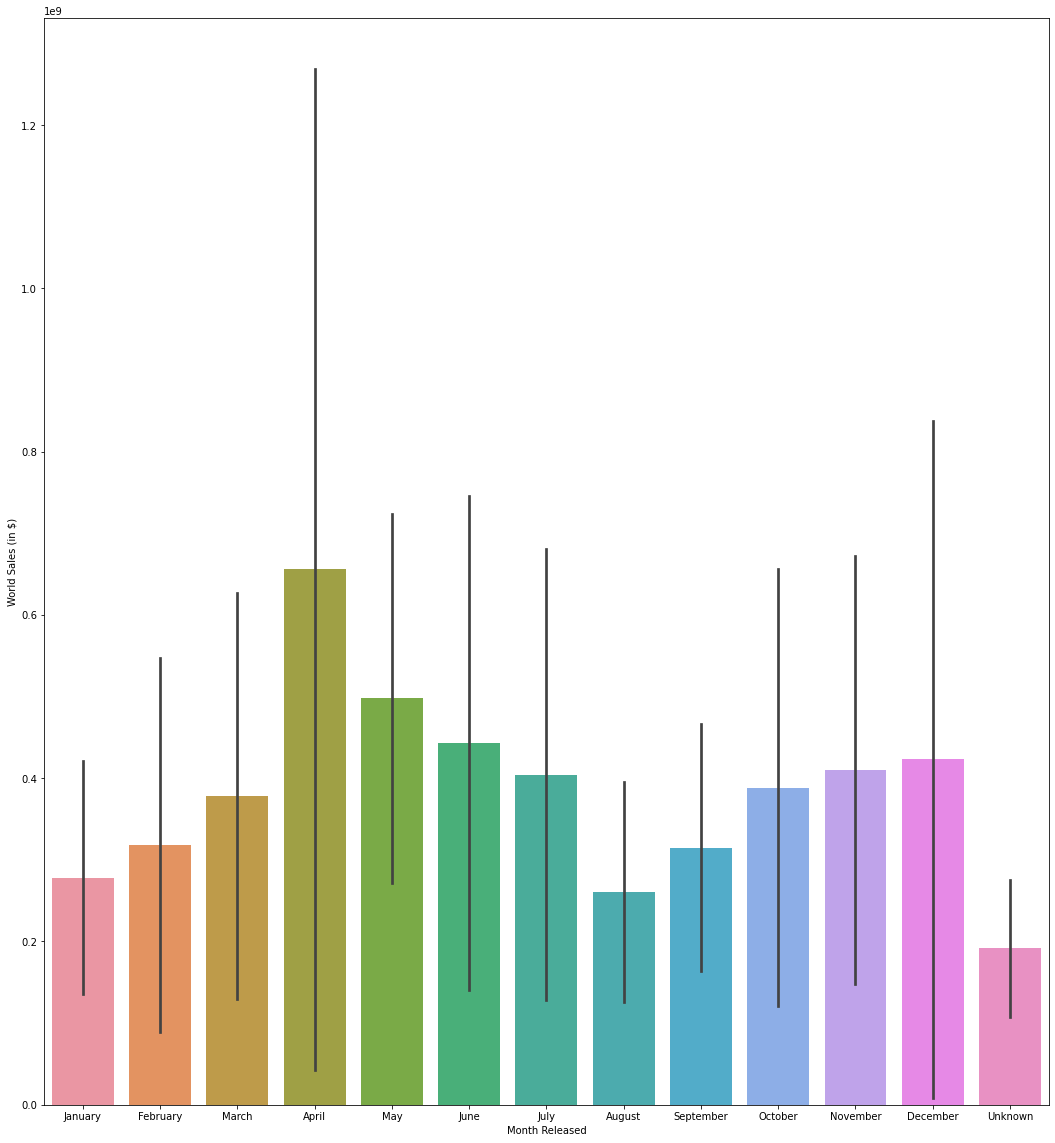

In [16]:
#plotting a bar plot to visualise
#Barplot for Months Released
f, axes = plt.subplots(1, figsize=(18, 20))
sb.barplot(x = 'Month Released', y = 'World Sales (in $)', data = MonthSales.sort_values(by=['Month Released'], key=lambda x: x.map(Months_dict)), orient = 'v', ci = 'sd')

The release date and sales relation seems to have a correlation with the school holidays in America

Runtime Analysis

In [17]:
#Create data frame for Movie Runtime columns
runtime_data = pd.DataFrame(movie_data['Movie Runtime'])


#Joint data frame for Movie Runtime and world sales data
jointruntimesales = pd.concat([runtime_data, world_sales], axis = 1)
jointruntimesales

,Movie Runtime,World Sales (in $)
0,2 hr 18 min,2069521700
1,3 hr 1 min,2797501328
2,2 hr 42 min,2847246203
3,2 hr 14 min,1347597973
4,2 hr 29 min,2048359754
...,...,...
913,2 hr 3 min,117815157
914,1 hr 22 min,102992536
915,2 hr 13 min,204594016
916,1 hr 38 min,107363905


Since Movie Runtime is in Hr,Min format, we will have to convert it to minutes

In [18]:
#Converting movie runtime data to delta format
runtime_data_convert = pd.to_timedelta(movie_data['Movie Runtime'])
runtime_data_convert

0     0 days 02:18:00
1     0 days 03:01:00
2     0 days 02:42:00
3     0 days 02:14:00
4     0 days 02:29:00
            ...      
913   0 days 02:03:00
914   0 days 01:22:00
915   0 days 02:13:00
916   0 days 01:38:00
917   0 days 01:42:00
Name: Movie Runtime, Length: 918, dtype: timedelta64[ns]

In [19]:
# calculate total_min
runtime_data_min =  runtime_data_convert / pd.Timedelta(seconds=1) /60
runtime_data_min

0      138.0
1      181.0
2      162.0
3      134.0
4      149.0
       ...  
913    123.0
914     82.0
915    133.0
916     98.0
917    102.0
Name: Movie Runtime, Length: 918, dtype: float64

In [20]:
#join the movie runtime in min with the world sales
jointruntimesales['Movie Runtime (in mins)'] = runtime_data_min
print(jointruntimesales)

    Movie Runtime  World Sales (in $)  Movie Runtime (in mins)
0     2 hr 18 min          2069521700                    138.0
1      3 hr 1 min          2797501328                    181.0
2     2 hr 42 min          2847246203                    162.0
3     2 hr 14 min          1347597973                    134.0
4     2 hr 29 min          2048359754                    149.0
..            ...                 ...                      ...
913    2 hr 3 min           117815157                    123.0
914   1 hr 22 min           102992536                     82.0
915   2 hr 13 min           204594016                    133.0
916   1 hr 38 min           107363905                     98.0
917   1 hr 42 min           169852759                    102.0

[918 rows x 3 columns]


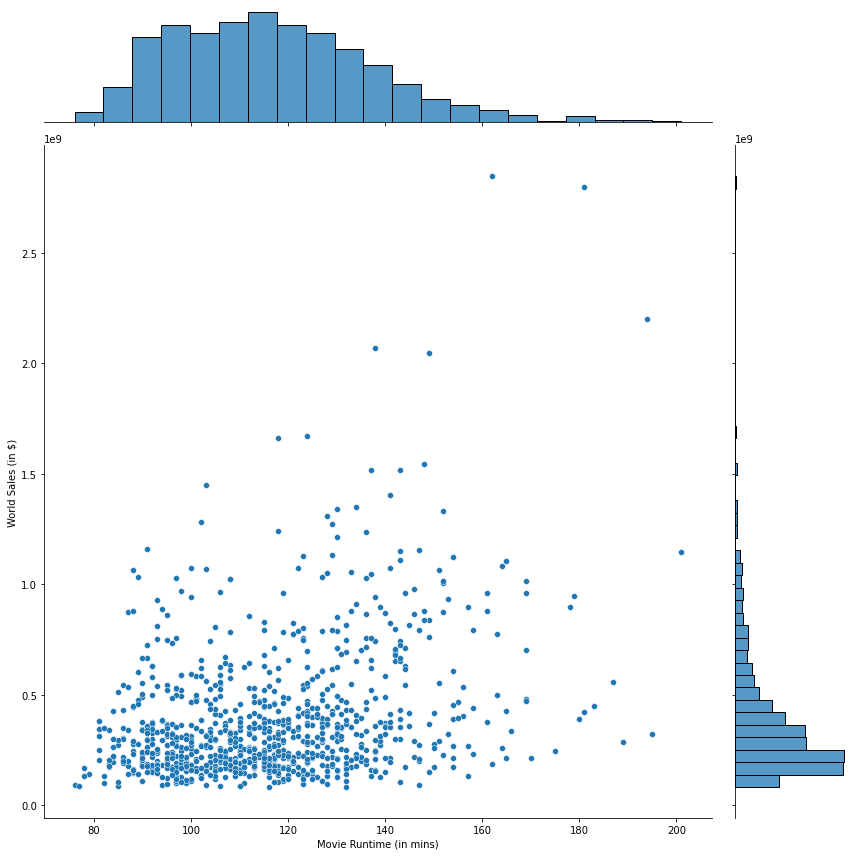

In [21]:
#plotting a jointplot for visualisation of movie runtime and world sales
sb.jointplot(data = jointruntimesales, x = 'Movie Runtime (in mins)', y = 'World Sales (in $)', height = 12)

In [22]:
jointruntimesales.corr()

,World Sales (in $),Movie Runtime (in mins)
World Sales (in $),1.00000,0.33167
Movie Runtime (in mins),0.33167,1.00000


In [23]:
#Creating a new Dataframe for Genre
Genre_data = pd.DataFrame(movie_data['Genre']) 
Genre_data['Genre'] = Genre_data['Genre'].str.replace('[^\w\s]', '')
Genre_data

C:\Users\SOLOMO~1\AppData\Local\Temp/ipykernel_406004/3281913995.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  Genre_data['Genre'] = Genre_data['Genre'].str.replace('[^\w\s]', '')


,Genre
0,Action Adventure SciFi
1,Action Adventure Drama SciFi
2,Action Adventure Fantasy SciFi
3,Action Adventure SciFi
4,Action Adventure SciFi
...,...
913,Drama Romance
914,Action Adventure Animation Comedy Family SciFi
915,Biography Drama Romance
916,Crime Horror


As a movie has many genres, we will split each genre such that a column has 1 only genre in it

In [24]:
#splitting up the data
Genre_data = Genre_data['Genre'].str.split(expand = True)
Genre_data

,0,1,2,3,4,5,6,7
0,Action,Adventure,SciFi,None,None,None,None,None
1,Action,Adventure,Drama,SciFi,None,None,None,None
2,Action,Adventure,Fantasy,SciFi,None,None,None,None
3,Action,Adventure,SciFi,None,None,None,None,None
4,Action,Adventure,SciFi,None,None,None,None,None
...,...,...,...,...,...,...,...,...
913,Drama,Romance,None,None,None,None,None,None
914,Action,Adventure,Animation,Comedy,Family,SciFi,None,None
915,Biography,Drama,Romance,None,None,None,None,None
916,Crime,Horror,None,None,None,None,None,None


Making a new dataset with previously analysed data

In [25]:
#new dataset using previously analysed data
jointGenreSales = pd.concat([world_sales, MonthSales['Month Released'] , distributor_data, runtime_data_min, Genre_data], axis = 1)
jointGenreSales.columns = ['World Sales (in $)','Month Released', 'Distributor', 'Movie Runtime (in mins)', 'Genre 1', 'Genre 2', 'Genre 3' , 'Genre 4', 'Genre 5', 'Genre 6', 'Genre 7', 'Genre 8']
jointGenreSales

,World Sales (in $),Month Released,Distributor,Movie Runtime (in mins),Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Genre 7,Genre 8
0,2069521700,December,Walt Disney Studios Motion Pictures,138.0,Action,Adventure,SciFi,None,None,None,None,None
1,2797501328,April,Walt Disney Studios Motion Pictures,181.0,Action,Adventure,Drama,SciFi,None,None,None,None
2,2847246203,December,Twentieth Century Fox,162.0,Action,Adventure,Fantasy,SciFi,None,None,None,None
3,1347597973,February,Walt Disney Studios Motion Pictures,134.0,Action,Adventure,SciFi,None,None,None,None,None
4,2048359754,April,Walt Disney Studios Motion Pictures,149.0,Action,Adventure,SciFi,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
913,117815157,June,New Line Cinema,123.0,Drama,Romance,None,None,None,None,None,None
914,102992536,December,Paramount Pictures,82.0,Action,Adventure,Animation,Comedy,Family,SciFi,None,None
915,204594016,August,Sony Pictures Entertainment (SPE),133.0,Biography,Drama,Romance,None,None,None,None,None
916,107363905,October,New Line Cinema,98.0,Crime,Horror,None,None,None,None,None,None


Changing the genre columns into rows by duplication

In [26]:
#duplicating World Sales, Month Released and Distributor 8 times
jointGenreSales = pd.melt(jointGenreSales, id_vars=['World Sales (in $)','Month Released', 'Distributor', 'Movie Runtime (in mins)'], value_vars=['Genre 1', 'Genre 2', 'Genre 3' , 'Genre 4', 'Genre 5', 'Genre 6', 'Genre 7', 'Genre 8'],
        value_name='Genres')
jointGenreSales.columns = ['World Sales (in $)','Month Released', 'Distributor', 'Movie Runtime (in mins)', 'delete','Genres']
jointGenreSales

,World Sales (in $),Month Released,Distributor,Movie Runtime (in mins),delete,Genres
0,2069521700,December,Walt Disney Studios Motion Pictures,138.0,Genre 1,Action
1,2797501328,April,Walt Disney Studios Motion Pictures,181.0,Genre 1,Action
2,2847246203,December,Twentieth Century Fox,162.0,Genre 1,Action
3,1347597973,February,Walt Disney Studios Motion Pictures,134.0,Genre 1,Action
4,2048359754,April,Walt Disney Studios Motion Pictures,149.0,Genre 1,Action
...,...,...,...,...,...,...
7339,117815157,June,New Line Cinema,123.0,Genre 8,None
7340,102992536,December,Paramount Pictures,82.0,Genre 8,None
7341,204594016,August,Sony Pictures Entertainment (SPE),133.0,Genre 8,None
7342,107363905,October,New Line Cinema,98.0,Genre 8,None


In [27]:
#new dataframe for World Sales and Genres
GenreSales = pd.concat([jointGenreSales['World Sales (in $)'], jointGenreSales['Genres']], axis = 1)
GenreSales

,World Sales (in $),Genres
0,2069521700,Action
1,2797501328,Action
2,2847246203,Action
3,1347597973,Action
4,2048359754,Action
...,...,...
7339,117815157,None
7340,102992536,None
7341,204594016,None
7342,107363905,None


In [28]:
#dropping NA values from dataframe
GenreSales.dropna(subset=['Genres'])

,World Sales (in $),Genres
0,2069521700,Action
1,2797501328,Action
2,2847246203,Action
3,1347597973,Action
4,2048359754,Action
...,...,...
6368,181216833,SciFi
6386,214040103,Musical
6595,443140005,Musical
6604,365352546,Musical


<AxesSubplot:xlabel='Genres', ylabel='World Sales (in $)'>

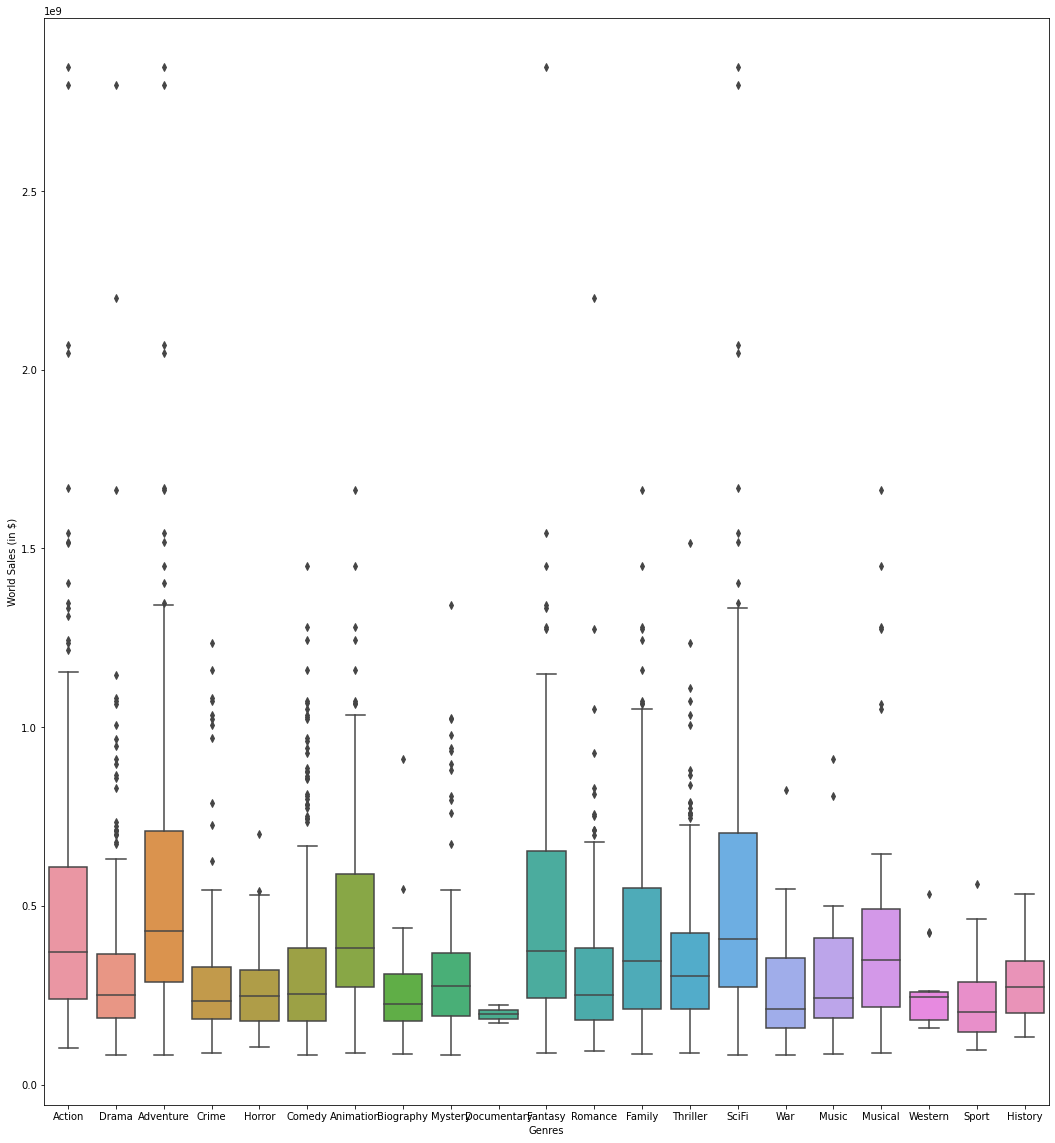

In [29]:
#plotting a boxplot for visualisation
f, axes = plt.subplots(1, figsize=(18, 20))
sb.boxplot(x = 'Genres', y = 'World Sales (in $)', data = GenreSales, orient = 'v')

Action Adventure Fantasy and Sci-fi Movies seems to fare better. 

In [30]:
info_total = pd.concat([world_sales, jointruntimesales['Movie Runtime (in mins)'],jointReleaseSales['Month Released']], axis = 1)
info_total.describe()

,World Sales (in $),Movie Runtime (in mins)
count,9.180000e+02,918.000000
mean,3.968668e+08,116.570806
std,3.082629e+08,20.875727
min,8.160000e+07,76.000000
25%,2.005564e+08,100.000000
50%,3.019416e+08,115.000000
75%,4.750718e+08,130.000000
max,2.847246e+09,201.000000


Using Logistic Regression to predict if a movie is in the third quartile of world sales using Month Released, Movie Runtime, Distributor and Genre


In [31]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)

In [32]:
#Assigning movies that are in third quartile of World Sales a value of 1
p75 = world_sales.quantile(0.75)[0] 
 
data = [] 

for i in range(len(world_sales['World Sales (in $)'])): 
    if world_sales['World Sales (in $)'][i] < p75: 
        data.append(0) 
    else: 
        data.append(1) 
         
fq= pd.DataFrame({'Third Quartile Sales':data})


In [33]:
#dataset for Logistic Regression
info_total = pd.concat([fq, jointruntimesales['Movie Runtime (in mins)'],jointReleaseSales['Month Released'],distributor_data], axis = 1)
info_total

,Third Quartile Sales,Movie Runtime (in mins),Month Released,Distributor
0,1,138.0,December,Walt Disney Studios Motion Pictures
1,1,181.0,April,Walt Disney Studios Motion Pictures
2,1,162.0,December,Twentieth Century Fox
3,1,134.0,February,Walt Disney Studios Motion Pictures
4,1,149.0,April,Walt Disney Studios Motion Pictures
...,...,...,...,...
913,0,123.0,June,New Line Cinema
914,0,82.0,December,Paramount Pictures
915,0,133.0,August,Sony Pictures Entertainment (SPE)
916,0,98.0,October,New Line Cinema


In [34]:
info_total['Third Quartile Sales'].value_counts()

0    688
1    230
Name: Third Quartile Sales, dtype: int64

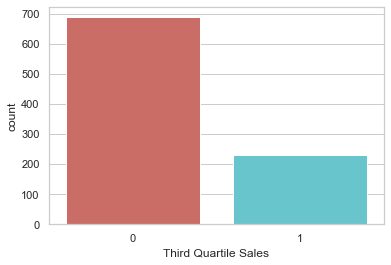

<Figure size 432x288 with 0 Axes>

In [35]:
#plotting a graph for Third Quartile Sales count
sb.countplot(x='Third Quartile Sales', data=info_total, palette='hls')
plt.show()
plt.savefig('count_plot')

In [36]:
#Binary Encoding of Movie Runtime dataset
info_total = pd.concat([fq, jointruntimesales['Movie Runtime (in mins)'],jointReleaseSales['Month Released'],distributor_data], axis = 1)
cat_vars1=['Movie Runtime (in mins)']
for var in cat_vars1:
    cat_list1='var'+'_'+var
    cat_list1 = pd.get_dummies(info_total[var], prefix=var)
    data12=info_total.join(cat_list1)
    info_total=data12
cat_vars1=['Movie Runtime (in mins)']
data_vars1=info_total.columns.values.tolist()
to_keep1=[i for i in data_vars1 if i not in cat_vars1]
data_final1=info_total[to_keep1]
data_final1.columns.values

array(['Third Quartile Sales', 'Month Released', 'Distributor',
       'Movie Runtime (in mins)_76.0', 'Movie Runtime (in mins)_77.0',
       'Movie Runtime (in mins)_78.0', 'Movie Runtime (in mins)_79.0',
       'Movie Runtime (in mins)_81.0', 'Movie Runtime (in mins)_82.0',
       'Movie Runtime (in mins)_83.0', 'Movie Runtime (in mins)_84.0',
       'Movie Runtime (in mins)_85.0', 'Movie Runtime (in mins)_86.0',
       'Movie Runtime (in mins)_87.0', 'Movie Runtime (in mins)_88.0',
       'Movie Runtime (in mins)_89.0', 'Movie Runtime (in mins)_90.0',
       'Movie Runtime (in mins)_91.0', 'Movie Runtime (in mins)_92.0',
       'Movie Runtime (in mins)_93.0', 'Movie Runtime (in mins)_94.0',
       'Movie Runtime (in mins)_95.0', 'Movie Runtime (in mins)_96.0',
       'Movie Runtime (in mins)_97.0', 'Movie Runtime (in mins)_98.0',
       'Movie Runtime (in mins)_99.0', 'Movie Runtime (in mins)_100.0',
       'Movie Runtime (in mins)_101.0', 'Movie Runtime (in mins)_102.0',
       'Mo

In [37]:
#keep column names in temp
temp = ['Movie Runtime (in mins)_76.0', 'Movie Runtime (in mins)_77.0',
       'Movie Runtime (in mins)_78.0', 'Movie Runtime (in mins)_79.0',
       'Movie Runtime (in mins)_81.0', 'Movie Runtime (in mins)_82.0',
       'Movie Runtime (in mins)_83.0', 'Movie Runtime (in mins)_84.0',
       'Movie Runtime (in mins)_85.0', 'Movie Runtime (in mins)_86.0',
       'Movie Runtime (in mins)_87.0', 'Movie Runtime (in mins)_88.0',
       'Movie Runtime (in mins)_89.0', 'Movie Runtime (in mins)_90.0',
       'Movie Runtime (in mins)_91.0', 'Movie Runtime (in mins)_92.0',
       'Movie Runtime (in mins)_93.0', 'Movie Runtime (in mins)_94.0',
       'Movie Runtime (in mins)_95.0', 'Movie Runtime (in mins)_96.0',
       'Movie Runtime (in mins)_97.0', 'Movie Runtime (in mins)_98.0',
       'Movie Runtime (in mins)_99.0', 'Movie Runtime (in mins)_100.0',
       'Movie Runtime (in mins)_101.0', 'Movie Runtime (in mins)_102.0',
       'Movie Runtime (in mins)_103.0', 'Movie Runtime (in mins)_104.0',
       'Movie Runtime (in mins)_105.0', 'Movie Runtime (in mins)_106.0',
       'Movie Runtime (in mins)_107.0', 'Movie Runtime (in mins)_108.0',
       'Movie Runtime (in mins)_109.0', 'Movie Runtime (in mins)_110.0',
       'Movie Runtime (in mins)_111.0', 'Movie Runtime (in mins)_112.0',
       'Movie Runtime (in mins)_113.0', 'Movie Runtime (in mins)_114.0',
       'Movie Runtime (in mins)_115.0', 'Movie Runtime (in mins)_116.0',
       'Movie Runtime (in mins)_117.0', 'Movie Runtime (in mins)_118.0',
       'Movie Runtime (in mins)_119.0', 'Movie Runtime (in mins)_120.0',
       'Movie Runtime (in mins)_121.0', 'Movie Runtime (in mins)_122.0',
       'Movie Runtime (in mins)_123.0', 'Movie Runtime (in mins)_124.0',
       'Movie Runtime (in mins)_125.0', 'Movie Runtime (in mins)_126.0',
       'Movie Runtime (in mins)_127.0', 'Movie Runtime (in mins)_128.0',
       'Movie Runtime (in mins)_129.0', 'Movie Runtime (in mins)_130.0',
       'Movie Runtime (in mins)_131.0', 'Movie Runtime (in mins)_132.0',
       'Movie Runtime (in mins)_133.0', 'Movie Runtime (in mins)_134.0',
       'Movie Runtime (in mins)_135.0', 'Movie Runtime (in mins)_136.0',
       'Movie Runtime (in mins)_137.0', 'Movie Runtime (in mins)_138.0',
       'Movie Runtime (in mins)_139.0', 'Movie Runtime (in mins)_140.0',
       'Movie Runtime (in mins)_141.0', 'Movie Runtime (in mins)_142.0',
       'Movie Runtime (in mins)_143.0', 'Movie Runtime (in mins)_144.0',
       'Movie Runtime (in mins)_145.0', 'Movie Runtime (in mins)_146.0',
       'Movie Runtime (in mins)_147.0', 'Movie Runtime (in mins)_148.0',
       'Movie Runtime (in mins)_149.0', 'Movie Runtime (in mins)_150.0',
       'Movie Runtime (in mins)_151.0', 'Movie Runtime (in mins)_152.0',
       'Movie Runtime (in mins)_153.0', 'Movie Runtime (in mins)_154.0',
       'Movie Runtime (in mins)_155.0', 'Movie Runtime (in mins)_156.0',
       'Movie Runtime (in mins)_157.0', 'Movie Runtime (in mins)_158.0',
       'Movie Runtime (in mins)_161.0', 'Movie Runtime (in mins)_162.0',
       'Movie Runtime (in mins)_163.0', 'Movie Runtime (in mins)_164.0',
       'Movie Runtime (in mins)_165.0', 'Movie Runtime (in mins)_166.0',
       'Movie Runtime (in mins)_169.0', 'Movie Runtime (in mins)_170.0',
       'Movie Runtime (in mins)_175.0', 'Movie Runtime (in mins)_178.0',
       'Movie Runtime (in mins)_179.0', 'Movie Runtime (in mins)_180.0',
       'Movie Runtime (in mins)_181.0', 'Movie Runtime (in mins)_183.0',
       'Movie Runtime (in mins)_187.0', 'Movie Runtime (in mins)_189.0',
       'Movie Runtime (in mins)_194.0', 'Movie Runtime (in mins)_195.0',
       'Movie Runtime (in mins)_201.0']
temp_x = data_final1[temp]
temp_y = data_final1["Third Quartile Sales"]

Movie Runtime:
Accuracy: 0.7565217391304347
Precision: 1.0
Recall: 0.017543859649122806


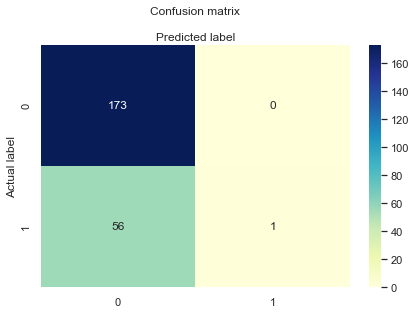

In [38]:
#Splitting data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp_x, temp_y,test_size=0.25, random_state=0)
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
#Confusion Matrix for Logistic Regression
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Movie Runtime:")
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

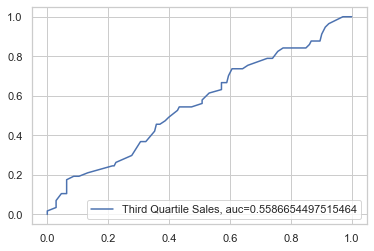

In [39]:
#plotting roc-auc graph for visualisation
y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Third Quartile Sales, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [40]:
#Binary Encoding of Month Released dataset
info_total = pd.concat([fq, jointruntimesales['Movie Runtime (in mins)'],jointReleaseSales['Month Released'],distributor_data], axis = 1)
cat_vars12=['Month Released']
for var in cat_vars12:
    cat_list12='var'+'_'+var
    cat_list12 = pd.get_dummies(info_total[var], prefix=var)
    data123=info_total.join(cat_list12)
    info_total=data123
cat_vars12=['Month Released']
data_vars12=info_total.columns.values.tolist()
to_keep12=[i for i in data_vars12 if i not in cat_vars12]
data_final12=info_total[to_keep12]
data_final12.columns.values

array(['Third Quartile Sales', 'Movie Runtime (in mins)', 'Distributor',
       'Month Released_April', 'Month Released_August',
       'Month Released_December', 'Month Released_February',
       'Month Released_January', 'Month Released_July',
       'Month Released_June', 'Month Released_March',
       'Month Released_May', 'Month Released_November',
       'Month Released_October', 'Month Released_September',
       'Month Released_Unknown'], dtype=object)

In [41]:
#keep column names in temp
temp = ['Month Released_April', 'Month Released_August',
       'Month Released_December', 'Month Released_February',
       'Month Released_January', 'Month Released_July',
       'Month Released_June', 'Month Released_March',
       'Month Released_May', 'Month Released_November',
       'Month Released_October', 'Month Released_September',
       'Month Released_Unknown']
temp_x = data_final12[temp]
temp_y = data_final12["Third Quartile Sales"]

Month Released:
Accuracy: 0.7521739130434782
Precision: 0.0
Recall: 0.0


C:\Users\Solomon Tneo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


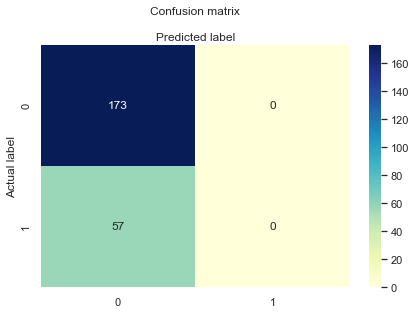

In [42]:
#Splitting data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp_x, temp_y,test_size=0.25, random_state=0)
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
#Confusion Matrix for Logistic Regression
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Month Released:")
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

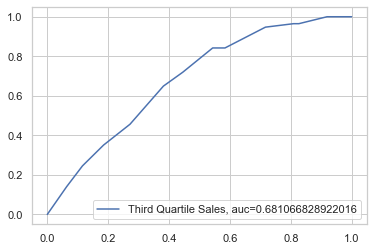

In [43]:
#plotting roc-auc graph for visualisation
y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Third Quartile Sales, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [44]:
#Binary Encoding of distributor dataset
info_total = pd.concat([fq, jointruntimesales['Movie Runtime (in mins)'],jointReleaseSales['Month Released'],distributor_data], axis = 1)
cat_vars123=['Distributor']
for var in cat_vars123:
    cat_list123='var'+'_'+var
    cat_list123 = pd.get_dummies(info_total[var], prefix=var)
    data1234=info_total.join(cat_list123)
    info_total=data1234
cat_vars123=['Distributor']
data_vars123=info_total.columns.values.tolist()
to_keep123=[i for i in data_vars123 if i not in cat_vars123]
data_final123=info_total[to_keep123]
data_final123.columns.values

array(['Third Quartile Sales', 'Movie Runtime (in mins)',
       'Month Released', 'Distributor_20th Century Studios',
       'Distributor_Artisan Entertainment',
       'Distributor_Columbia Pictures', 'Distributor_Dimension Films',
       'Distributor_DreamWorks', 'Distributor_DreamWorks Distribution',
       'Distributor_FilmDistrict', 'Distributor_Focus Features',
       'Distributor_Fox Searchlight Pictures', 'Distributor_IFC Films',
       'Distributor_Lionsgate', 'Distributor_Metro-Goldwyn-Mayer (MGM)',
       'Distributor_Miramax', 'Distributor_New Line Cinema',
       'Distributor_Newmarket Films', 'Distributor_Orion Pictures',
       'Distributor_Paramount Pictures', 'Distributor_Relativity Media',
       'Distributor_Revolution Studios',
       'Distributor_Roadside Attractions',
       'Distributor_STX Entertainment', 'Distributor_Screen Gems',
       'Distributor_Sony Pictures Classics',
       'Distributor_Sony Pictures Entertainment (SPE)',
       'Distributor_Summit Ent

In [45]:
#keep column names in temp
temp = ['Distributor_20th Century Studios',
       'Distributor_Artisan Entertainment',
       'Distributor_Columbia Pictures', 'Distributor_Dimension Films',
       'Distributor_DreamWorks', 'Distributor_DreamWorks Distribution',
       'Distributor_FilmDistrict', 'Distributor_Focus Features',
       'Distributor_Fox Searchlight Pictures', 'Distributor_IFC Films',
       'Distributor_Lionsgate', 'Distributor_Metro-Goldwyn-Mayer (MGM)',
       'Distributor_Miramax', 'Distributor_New Line Cinema',
       'Distributor_Newmarket Films', 'Distributor_Orion Pictures',
       'Distributor_Paramount Pictures', 'Distributor_Relativity Media',
       'Distributor_Revolution Studios',
       'Distributor_Roadside Attractions',
       'Distributor_STX Entertainment', 'Distributor_Screen Gems',
       'Distributor_Sony Pictures Classics',
       'Distributor_Sony Pictures Entertainment (SPE)',
       'Distributor_Summit Entertainment',
       'Distributor_The Weinstein Company',
       'Distributor_TriStar Pictures',
       'Distributor_Twentieth Century Fox', 'Distributor_USA Films',
       'Distributor_United Artists',
       'Distributor_United Artists Releasing',
       'Distributor_Universal Pictures',
       'Distributor_Walt Disney Studios Motion Pictures',
       'Distributor_Warner Bros.']
temp_x = data_final123[temp]
temp_y = data_final123["Third Quartile Sales"]

Distributor
Accuracy: 0.7521739130434782
Precision: 0.0
Recall: 0.0


C:\Users\Solomon Tneo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


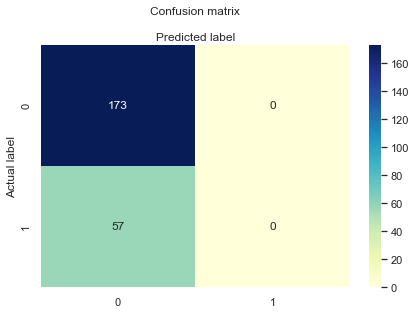

In [46]:
#Splitting data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp_x, temp_y,test_size=0.25, random_state=0)
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
#Confusion Matrix for Logistic Regression
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Distributor")
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

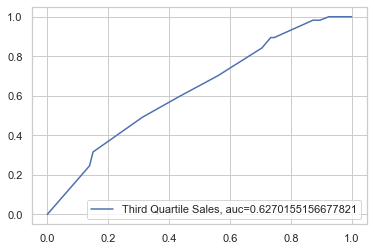

In [47]:
#plotting roc-auc graph for visualisation
y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Third Quartile Sales, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [48]:
#Assigning movies that are in Third quartile of World Sales a value of 1
p75 = world_sales.quantile(0.75)[0] 
 
data = [] 

for i in range(len(jointGenreSales['World Sales (in $)'])): 
    if jointGenreSales['World Sales (in $)'][i] < p75: 
        data.append(0) 
    else: 
        data.append(1) 
         
fq= pd.DataFrame({'Third Quartile Sales':data})

In [49]:
#Binary Encoding of dataset
info_total = pd.concat([fq, jointGenreSales['Movie Runtime (in mins)'].dropna(),jointGenreSales['Month Released'].dropna(),jointGenreSales['Distributor'].dropna(), jointGenreSales['Genres'].dropna()], axis = 1)
info_total = info_total.dropna()
cat_vars1234=['Genres']
for var in cat_vars1234:
    cat_list1234='var'+'_'+var
    cat_list1234 = pd.get_dummies(info_total[var], prefix=var)
    data12345=info_total.join(cat_list1234)
    info_total=data12345
cat_vars1234=['Genres']
data_vars1234=info_total.columns.values.tolist()
to_keep1234=[i for i in data_vars1234 if i not in cat_vars1234]
data_final1234=info_total[to_keep1234]
data_final1234.columns.values

array(['Third Quartile Sales', 'Movie Runtime (in mins)',
       'Month Released', 'Distributor', 'Genres_Action',
       'Genres_Adventure', 'Genres_Animation', 'Genres_Biography',
       'Genres_Comedy', 'Genres_Crime', 'Genres_Documentary',
       'Genres_Drama', 'Genres_Family', 'Genres_Fantasy',
       'Genres_History', 'Genres_Horror', 'Genres_Music',
       'Genres_Musical', 'Genres_Mystery', 'Genres_Romance',
       'Genres_SciFi', 'Genres_Sport', 'Genres_Thriller', 'Genres_War',
       'Genres_Western'], dtype=object)

In [50]:
#keep column names in temp
temp =['Genres_Action', 'Genres_Adventure',
       'Genres_Animation', 'Genres_Biography', 'Genres_Comedy',
       'Genres_Crime', 'Genres_Documentary', 'Genres_Drama',
       'Genres_Family', 'Genres_Fantasy', 'Genres_History',
       'Genres_Horror', 'Genres_Music', 'Genres_Musical',
       'Genres_Mystery', 'Genres_Romance', 'Genres_SciFi', 'Genres_Sport',
       'Genres_Thriller', 'Genres_War', 'Genres_Western']
temp_x = data_final1234[temp]
temp_y = data_final1234["Third Quartile Sales"]

Genres:
Accuracy: 0.726932668329177
Precision: 0.0
Recall: 0.0


C:\Users\Solomon Tneo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


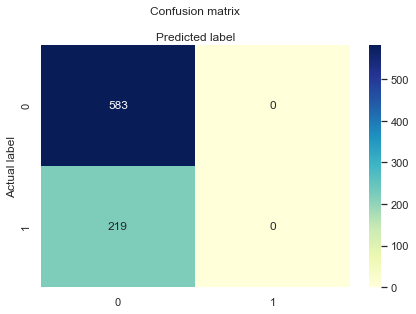

In [51]:
#Splitting data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp_x, temp_y,test_size=0.25, random_state=0)
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
#Confusion Matrix for Logistic Regression
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Genres:")
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

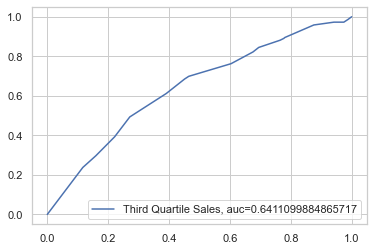

In [52]:
#plotting roc-auc graph for visualisation
y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Third Quartile Sales, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [53]:
#Binary Encoding of dataset for all 4 variable
info_total = pd.concat([fq, jointGenreSales['Movie Runtime (in mins)'].dropna(),jointGenreSales['Month Released'].dropna(),jointGenreSales['Distributor'].dropna(), jointGenreSales['Genres'].dropna()], axis = 1)
info_total = info_total.dropna()
cat_vars=['Movie Runtime (in mins)','Month Released','Distributor', 'Genres']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(info_total[var], prefix=var)
    data1=info_total.join(cat_list)
    info_total=data1
cat_vars=['Movie Runtime (in mins)','Month Released','Distributor', 'Genres']
data_vars=info_total.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=info_total[to_keep]
data_final.columns.values

array(['Third Quartile Sales', 'Movie Runtime (in mins)_76.0',
       'Movie Runtime (in mins)_77.0', 'Movie Runtime (in mins)_78.0',
       'Movie Runtime (in mins)_79.0', 'Movie Runtime (in mins)_81.0',
       'Movie Runtime (in mins)_82.0', 'Movie Runtime (in mins)_83.0',
       'Movie Runtime (in mins)_84.0', 'Movie Runtime (in mins)_85.0',
       'Movie Runtime (in mins)_86.0', 'Movie Runtime (in mins)_87.0',
       'Movie Runtime (in mins)_88.0', 'Movie Runtime (in mins)_89.0',
       'Movie Runtime (in mins)_90.0', 'Movie Runtime (in mins)_91.0',
       'Movie Runtime (in mins)_92.0', 'Movie Runtime (in mins)_93.0',
       'Movie Runtime (in mins)_94.0', 'Movie Runtime (in mins)_95.0',
       'Movie Runtime (in mins)_96.0', 'Movie Runtime (in mins)_97.0',
       'Movie Runtime (in mins)_98.0', 'Movie Runtime (in mins)_99.0',
       'Movie Runtime (in mins)_100.0', 'Movie Runtime (in mins)_101.0',
       'Movie Runtime (in mins)_102.0', 'Movie Runtime (in mins)_103.0',
       'Mo

In [55]:
#keep column names in temp
temp =['Movie Runtime (in mins)_76.0',
       'Movie Runtime (in mins)_77.0', 'Movie Runtime (in mins)_78.0',
       'Movie Runtime (in mins)_79.0', 'Movie Runtime (in mins)_81.0',
       'Movie Runtime (in mins)_82.0', 'Movie Runtime (in mins)_83.0',
       'Movie Runtime (in mins)_84.0', 'Movie Runtime (in mins)_85.0',
       'Movie Runtime (in mins)_86.0', 'Movie Runtime (in mins)_87.0',
       'Movie Runtime (in mins)_88.0', 'Movie Runtime (in mins)_89.0',
       'Movie Runtime (in mins)_90.0', 'Movie Runtime (in mins)_91.0',
       'Movie Runtime (in mins)_92.0', 'Movie Runtime (in mins)_93.0',
       'Movie Runtime (in mins)_94.0', 'Movie Runtime (in mins)_95.0',
       'Movie Runtime (in mins)_96.0', 'Movie Runtime (in mins)_97.0',
       'Movie Runtime (in mins)_98.0', 'Movie Runtime (in mins)_99.0',
       'Movie Runtime (in mins)_100.0', 'Movie Runtime (in mins)_101.0',
       'Movie Runtime (in mins)_102.0', 'Movie Runtime (in mins)_103.0',
       'Movie Runtime (in mins)_104.0', 'Movie Runtime (in mins)_105.0',
       'Movie Runtime (in mins)_106.0', 'Movie Runtime (in mins)_107.0',
       'Movie Runtime (in mins)_108.0', 'Movie Runtime (in mins)_109.0',
       'Movie Runtime (in mins)_110.0', 'Movie Runtime (in mins)_111.0',
       'Movie Runtime (in mins)_112.0', 'Movie Runtime (in mins)_113.0',
       'Movie Runtime (in mins)_114.0', 'Movie Runtime (in mins)_115.0',
       'Movie Runtime (in mins)_116.0', 'Movie Runtime (in mins)_117.0',
       'Movie Runtime (in mins)_118.0', 'Movie Runtime (in mins)_119.0',
       'Movie Runtime (in mins)_120.0', 'Movie Runtime (in mins)_121.0',
       'Movie Runtime (in mins)_122.0', 'Movie Runtime (in mins)_123.0',
       'Movie Runtime (in mins)_124.0', 'Movie Runtime (in mins)_125.0',
       'Movie Runtime (in mins)_126.0', 'Movie Runtime (in mins)_127.0',
       'Movie Runtime (in mins)_128.0', 'Movie Runtime (in mins)_129.0',
       'Movie Runtime (in mins)_130.0', 'Movie Runtime (in mins)_131.0',
       'Movie Runtime (in mins)_132.0', 'Movie Runtime (in mins)_133.0',
       'Movie Runtime (in mins)_134.0', 'Movie Runtime (in mins)_135.0',
       'Movie Runtime (in mins)_136.0', 'Movie Runtime (in mins)_137.0',
       'Movie Runtime (in mins)_138.0', 'Movie Runtime (in mins)_139.0',
       'Movie Runtime (in mins)_140.0', 'Movie Runtime (in mins)_141.0',
       'Movie Runtime (in mins)_142.0', 'Movie Runtime (in mins)_143.0',
       'Movie Runtime (in mins)_144.0', 'Movie Runtime (in mins)_145.0',
       'Movie Runtime (in mins)_146.0', 'Movie Runtime (in mins)_147.0',
       'Movie Runtime (in mins)_148.0', 'Movie Runtime (in mins)_149.0',
       'Movie Runtime (in mins)_150.0', 'Movie Runtime (in mins)_151.0',
       'Movie Runtime (in mins)_152.0', 'Movie Runtime (in mins)_153.0',
       'Movie Runtime (in mins)_154.0', 'Movie Runtime (in mins)_155.0',
       'Movie Runtime (in mins)_156.0', 'Movie Runtime (in mins)_157.0',
       'Movie Runtime (in mins)_158.0', 'Movie Runtime (in mins)_161.0',
       'Movie Runtime (in mins)_162.0', 'Movie Runtime (in mins)_163.0',
       'Movie Runtime (in mins)_164.0', 'Movie Runtime (in mins)_165.0',
       'Movie Runtime (in mins)_166.0', 'Movie Runtime (in mins)_169.0',
       'Movie Runtime (in mins)_170.0', 'Movie Runtime (in mins)_175.0',
       'Movie Runtime (in mins)_178.0', 'Movie Runtime (in mins)_179.0',
       'Movie Runtime (in mins)_180.0', 'Movie Runtime (in mins)_181.0',
       'Movie Runtime (in mins)_183.0', 'Movie Runtime (in mins)_187.0',
       'Movie Runtime (in mins)_189.0', 'Movie Runtime (in mins)_194.0',
       'Movie Runtime (in mins)_195.0', 'Movie Runtime (in mins)_201.0',
       'Month Released_April', 'Month Released_August',
       'Month Released_December', 'Month Released_February',
       'Month Released_January', 'Month Released_July',
       'Month Released_June', 'Month Released_March',
       'Month Released_May', 'Month Released_November',
       'Month Released_October', 'Month Released_September',
       'Month Released_Unknown', 'Distributor_20th Century Studios',
       'Distributor_Artisan Entertainment',
       'Distributor_Columbia Pictures', 'Distributor_Dimension Films',
       'Distributor_DreamWorks', 'Distributor_DreamWorks Distribution',
       'Distributor_FilmDistrict', 'Distributor_Focus Features',
       'Distributor_Fox Searchlight Pictures', 'Distributor_IFC Films',
       'Distributor_Lionsgate', 'Distributor_Metro-Goldwyn-Mayer (MGM)',
       'Distributor_Miramax', 'Distributor_New Line Cinema',
       'Distributor_Newmarket Films', 'Distributor_Orion Pictures',
       'Distributor_Paramount Pictures', 'Distributor_Relativity Media',
       'Distributor_Revolution Studios',
       'Distributor_Roadside Attractions',
       'Distributor_STX Entertainment', 'Distributor_Screen Gems',
       'Distributor_Sony Pictures Classics',
       'Distributor_Sony Pictures Entertainment (SPE)',
       'Distributor_Summit Entertainment',
       'Distributor_The Weinstein Company',
       'Distributor_TriStar Pictures',
       'Distributor_Twentieth Century Fox', 'Distributor_USA Films',
       'Distributor_United Artists',
       'Distributor_United Artists Releasing',
       'Distributor_Universal Pictures',
       'Distributor_Walt Disney Studios Motion Pictures',
       'Distributor_Warner Bros.', 'Genres_Action', 'Genres_Adventure',
       'Genres_Animation', 'Genres_Biography', 'Genres_Comedy',
       'Genres_Crime', 'Genres_Documentary', 'Genres_Drama',
       'Genres_Family', 'Genres_Fantasy', 'Genres_History',
       'Genres_Horror', 'Genres_Music', 'Genres_Musical',
       'Genres_Mystery', 'Genres_Romance', 'Genres_SciFi', 'Genres_Sport',
       'Genres_Thriller', 'Genres_War', 'Genres_Western']
temp_x = data_final[temp]
temp_y = data_final["Third Quartile Sales"]

Overall:
Accuracy: 0.8092269326683291
Precision: 0.6875
Recall: 0.5525114155251142


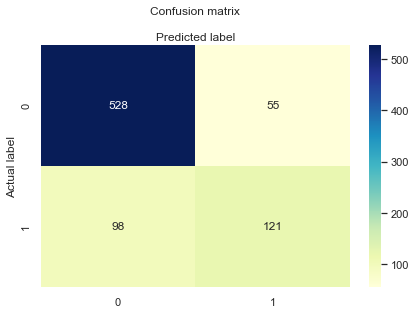

In [56]:
#Splitting data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(temp_x, temp_y,test_size=0.25, random_state=0)
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
#Confusion Matrix for Logistic Regression
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Overall:")
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

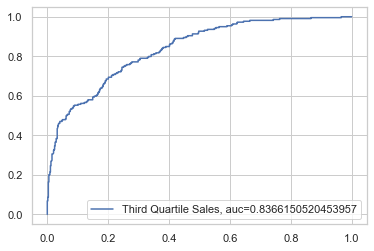

In [57]:
#plotting roc-auc graph for visualisation
y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Third Quartile Sales, auc="+str(auc))
plt.legend(loc=4)
plt.show()